In [36]:
!pip install qiskit qiskit-ionq qiskit_aer numpy matplotlib

In [26]:
#external libraries and dependencies

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ionq import IonQProvider
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

#internal dependencies

from DeferredCircuit import ionq_circuit_X, ionq_circuit_Y, ionq_circuit_Z
from BaseCircuit import midcircuit_X, midcircuit_Y, midcircuit_Z
from AriaNoiseModel import build_noise_aria1
from Simulation import BaseXCounts, BaseYCounts, BaseZCounts
from Fidelity import fidelity
from Depth import depth
from GateCount import gate_count
from Efficiency import reuse_efficiency
from MemoryLoad import memory_load


In [27]:
#set up the ionq provider and backend
provider = IonQProvider(
    token="", #from the ionq site
    url="https://api.ionq.co/v0.3")

backend = provider.get_backend("simulator", gateset="native")
backend.set_options(noise_model="aria-1")


#set up the Aer simulator
sim = AerSimulator(noise_model=build_noise_aria1())

# the number of rounds
n_max = 10


In [12]:
ionq_counts_X, qiskit_counts_X= BaseXCounts(backend, sim, n_max, ionq_circuit_X, midcircuit_X)
ionq_counts_Y, qiskit_counts_Y= BaseYCounts(backend, sim, n_max, ionq_circuit_Y, midcircuit_Y)
ionq_counts_Z, qiskit_counts_Z= BaseZCounts(backend, sim, n_max, ionq_circuit_Z, midcircuit_Z)

In [13]:
fidelities = fidelity(qiskit_counts_Z, qiskit_counts_X, qiskit_counts_Y,
                      ionq_counts_Z, ionq_counts_X, ionq_counts_Y, n_max)


In [14]:
for n, fid in fidelities.items():
    print(f"Round {n}: Weighted Fidelity = {fid:.6f}")


Round 1: Weighted Fidelity = 0.996270
Round 2: Weighted Fidelity = 0.996114
Round 3: Weighted Fidelity = 0.981174
Round 4: Weighted Fidelity = 0.952117
Round 5: Weighted Fidelity = 0.942919
Round 6: Weighted Fidelity = 0.897306
Round 7: Weighted Fidelity = 0.858184
Round 8: Weighted Fidelity = 0.851627
Round 9: Weighted Fidelity = 0.842342
Round 10: Weighted Fidelity = 0.783112


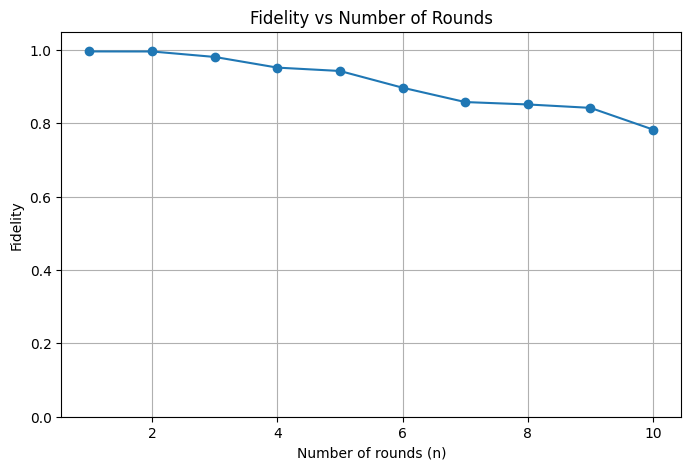

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max+1), fidelities.values(), 'o-')
plt.xlabel('Number of rounds (n)')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Number of Rounds')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.show()

In [37]:
n_max=20
depths1, depths2 = depth(ionq_circuit_Z, midcircuit_Z, n_max)

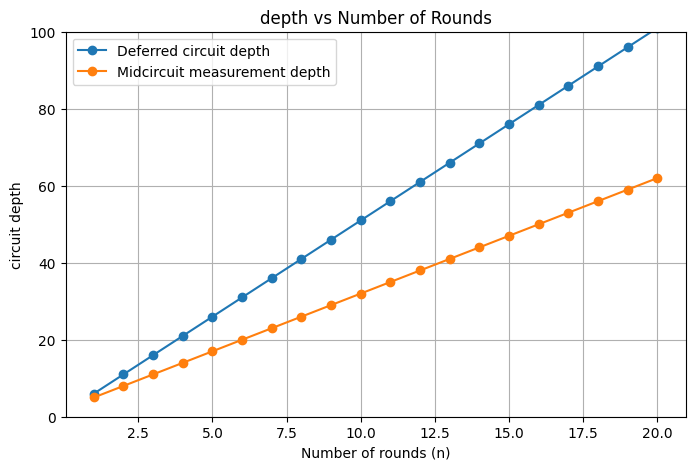

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), depths1, 'o-', label='Deferred circuit depth')
plt.plot(range(1, n_max + 1), depths2, 'o-', label='Midcircuit measurement depth')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit depth')
plt.title('depth vs Number of Rounds')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

In [39]:
gate_counts1, gate_counts2 = gate_count(ionq_circuit_Z, midcircuit_Z, n_max)

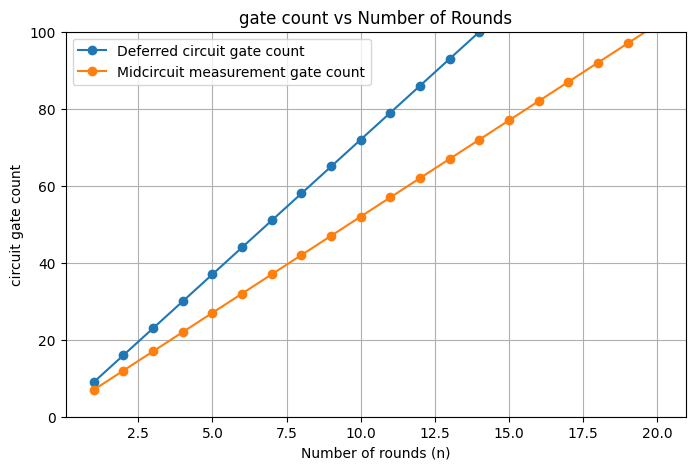

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), gate_counts1, 'o-', label='Deferred circuit gate count')
plt.plot(range(1, n_max + 1), gate_counts2, 'o-', label='Midcircuit measurement gate count')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit gate count')
plt.title('gate count vs Number of Rounds')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

In [41]:
deferred_ones, measured_ones = reuse_efficiency(ionq_circuit_Z, midcircuit_Z, n_max)

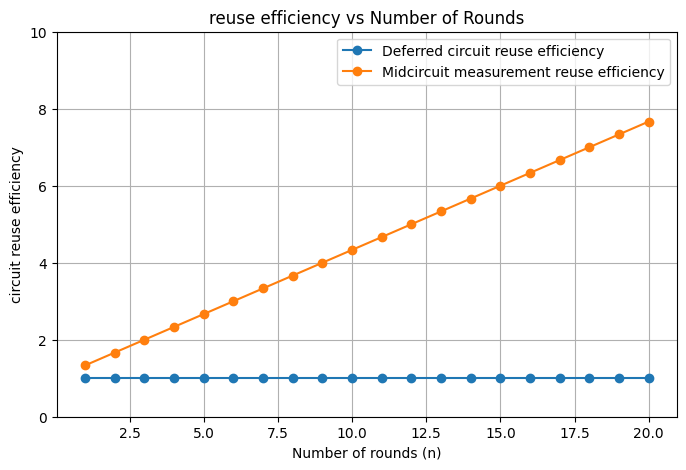

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), deferred_ones, 'o-', label='Deferred circuit reuse efficiency')
plt.plot(range(1, n_max + 1), measured_ones, 'o-', label='Midcircuit measurement reuse efficiency')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit reuse efficiency')
plt.title('reuse efficiency vs Number of Rounds')
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

In [43]:
statevector_MB1, statevector_MB2 = memory_load(ionq_circuit_Z, midcircuit_Z, n_max)

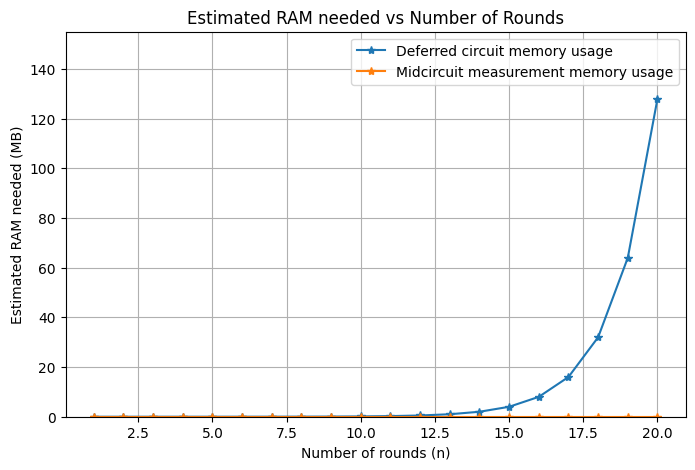

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), statevector_MB1, '*-', label='Deferred circuit memory usage')
plt.plot(range(1, n_max + 1), statevector_MB2, '*-', label='Midcircuit measurement memory usage')
plt.xlabel('Number of rounds (n)')
plt.ylabel('Estimated RAM needed (MB)')
plt.title('Estimated RAM needed vs Number of Rounds')
plt.ylim(0, 155)
plt.grid(True)
plt.legend()
plt.show()